In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('../Original_Data/billboard.csv',encoding = "ISO-8859-1" )

In [94]:
df = df.rename(columns = {'artist.inverted': 'artist',
                          'date.entered': 'data_entered'                           
                         }).drop('date.peaked',axis=True)
df

,year,artist,track,time,genre,data_entered,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,98,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,99,99.0,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,99,99.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,99,99.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#Podział danych na 2 tabele, jedna opisuje szczegoly danej piosenki a druga szczegóły notowań.
df_ranking_info = df.drop(['artist','track','time','genre','year'],axis=1)

map_dict = {df_ranking_info.columns[i]: f'week_{i}' for i in range(1,len(df_ranking_info.columns)) }
df_ranking_info = df_ranking_info.rename(columns = map_dict)
df_ranking_info

,data_entered,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,...,week_67,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76
0,2000-09-23,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-12,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-10-23,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-08-12,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-08-05,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000-08-05,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000-02-12,99,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000-09-02,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000-07-01,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_music_info = df[['artist','track','time','genre']]
df_music_info.to_csv('../Analysis_Data/Music_info.csv',index=False)
df_music_info

,artist,track,time,genre
0,Destiny's Child,Independent Women Part I,3:38,Rock
1,Santana,"Maria, Maria",4:18,Rock
2,Savage Garden,I Knew I Loved You,4:07,Rock
3,Madonna,Music,3:45,Rock
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock
...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,3:04,R&B
313,"Smith, Will",Freakin' It,3:58,Rap
314,Zombie Nation,Kernkraft 400,3:30,Rock
315,"Eastsidaz, The",Got Beef,3:58,Rap


In [97]:
#Jeżeli chcemy połączyć obie tabele, możemy to prosto zrobić za pomocą funkcji pd.concat
df = pd.concat([df_music_info,df_ranking_info],axis=1)
df

,artist,track,time,genre,data_entered,week_1,week_2,week_3,week_4,week_5,...,week_67,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,78,63.0,49.0,33.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,15,8.0,6.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,71,48.0,43.0,31.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,Rock,2000-08-12,41,23.0,18.0,14.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,57,47.0,45.0,29.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,98,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,99,99.0,99.0,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        317 non-null    object 
 1   track         317 non-null    object 
 2   time          317 non-null    object 
 3   genre         317 non-null    object 
 4   data_entered  317 non-null    object 
 5   week_1        317 non-null    int64  
 6   week_2        312 non-null    float64
 7   week_3        307 non-null    float64
 8   week_4        300 non-null    float64
 9   week_5        292 non-null    float64
 10  week_6        280 non-null    float64
 11  week_7        269 non-null    float64
 12  week_8        260 non-null    float64
 13  week_9        253 non-null    float64
 14  week_10       244 non-null    float64
 15  week_11       236 non-null    float64
 16  week_12       222 non-null    float64
 17  week_13       210 non-null    float64
 18  week_14       204 non-null    

In [99]:
df.describe()

,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_67,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76
count,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,244.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,45.786885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,28.152357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,24.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,40.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,69.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
pd.set_option('display.max_rows', 100)
print('Procent danych Nan dla danego feature')
(df.isnull().sum())/(df.shape[0]) * 100

Procent danych Nan dla danego feature


artist            0.000000
track             0.000000
time              0.000000
genre             0.000000
data_entered      0.000000
week_1            0.000000
week_2            1.577287
week_3            3.154574
week_4            5.362776
week_5            7.886435
week_6           11.671924
week_7           15.141956
week_8           17.981073
week_9           20.189274
week_10          23.028391
week_11          25.552050
week_12          29.968454
week_13          33.753943
week_14          35.646688
week_15          37.854890
week_16          42.586751
week_17          44.164038
week_18          47.634069
week_19          50.788644
week_20          53.943218
week_21          79.495268
week_22          82.649842
week_23          84.858044
week_24          85.488959
week_25          88.012618
week_26          88.643533
week_27          90.851735
week_28          92.429022
week_29          93.690852
week_30          93.690852
week_31          94.006309
week_32          94.321767
w

In [101]:
df_ranking_info

,data_entered,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,...,week_67,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76
0,2000-09-23,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-12,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-10-23,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-08-12,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-08-05,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000-08-05,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000-02-12,99,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000-09-02,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000-07-01,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Jak widać dla notowania 66 i kolejnych, wszystkie dane są typu Nan, więc je możemy z pewnością odrzucić. Reszte notowań zostawiam, gdyż znajde w nich informacje o co najmniej jednym utworze, artyście lub gatunku notowanym na liście. 

In [102]:
df = df.drop(['week_66','week_67','week_68','week_69','week_70','week_71','week_72','week_73','week_74','week_75'],axis=1)
df_ranking_info = df_ranking_info.drop(['week_66','week_67','week_68','week_69','week_70','week_71','week_72','week_73','week_74','week_75'],axis=1)

df.to_csv('../Analysis_Data/Cleaned_data.csv',index=False)
df_ranking_info.to_csv('../Analysis_Data/Ranking_info.csv',index=False)

In [103]:
plt.style.use('ggplot')

In [104]:
plt.figure(figsize=(12,8))
print('Artyści z największą ilością utworów na listach')
df['artist'].value_counts().head(20)

Artyści z największą ilością utworów na listach


Jay-Z                   5
Houston, Whitney        4
Dixie Chicks, The       4
Destiny's Child         3
Limp Bizkit             3
Spears, Britney         3
Backstreet Boys, The    3
Rimes, LeAnn            3
DMX                     3
Martin, Ricky           3
Eminem                  3
McGraw, Tim             3
SheDaisy                3
Price, Kelly            3
Braxton, Toni           3
Sisqo                   3
Jackson, Alan           3
Thomas, Carl            3
Aguilera, Christina     3
N'Sync                  3
Name: artist, dtype: int64

<Figure size 1200x800 with 0 Axes>

In [105]:
#Grupowanie danych po artystach
df_gr = df.groupby(by='artist').sum(numeric_only=True).sort_values(by='week_1',ascending=False)
df_gr

,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_57,week_58,week_59,week_60,week_61,week_62,week_63,week_64,week_65,week_76
artist,,,,,,,,,,,,,,,,,,,,,
Jay-Z,392,323.0,292.0,273.0,271.0,285.0,297.0,303.0,204.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Houston, Whitney",309,290.0,266.0,194.0,168.0,170.0,173.0,183.0,206.0,136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DMX,284,245.0,226.0,212.0,202.0,196.0,176.0,182.0,175.0,178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Dixie Chicks, The",279,250.0,233.0,213.0,190.0,189.0,185.0,174.0,194.0,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Price, Kelly",265,251.0,258.0,251.0,157.0,158.0,161.0,164.0,70.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lil Bow Wow,48,35.0,24.0,24.0,20.0,20.0,20.0,20.0,22.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guy,46,29.0,19.0,22.0,36.0,44.0,58.0,58.0,68.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Elliott, Missy ""Misdemeanor""",36,21.0,13.0,9.0,7.0,7.0,5.0,7.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
#Sumowanie czasu notowania artystów na listach
df_gr['Sum_time'] = df_gr.sum(axis=1)

In [107]:
print('20 najczęściej notowanych artystów na liście billboard')
df_gr.sort_values('Sum_time',ascending=False)['Sum_time'].to_csv('../Analysis_Data/Artist_on_bilboard.csv')
df_gr.sort_values('Sum_time',ascending=False)['Sum_time'].head(20)

20 najczęściej notowanych artystów na liście billboard


artist
Limp Bizkit          3960.0
Jay-Z                3727.0
Creed                3691.0
Lonestar             3674.0
Dixie Chicks, The    3423.0
Rimes, LeAnn         3365.0
DMX                  3271.0
Jackson, Alan        3262.0
Houston, Whitney     3174.0
Thomas, Carl         2990.0
McGraw, Tim          2788.0
3 Doors Down         2745.0
Price, Kelly         2589.0
Metallica            2566.0
McEntire, Reba       2560.0
Sisqo                2410.0
Vassar, Phil         2402.0
Anthony, Marc        2392.0
Chesney, Kenny       2362.0
Eminem               2343.0
Name: Sum_time, dtype: float64

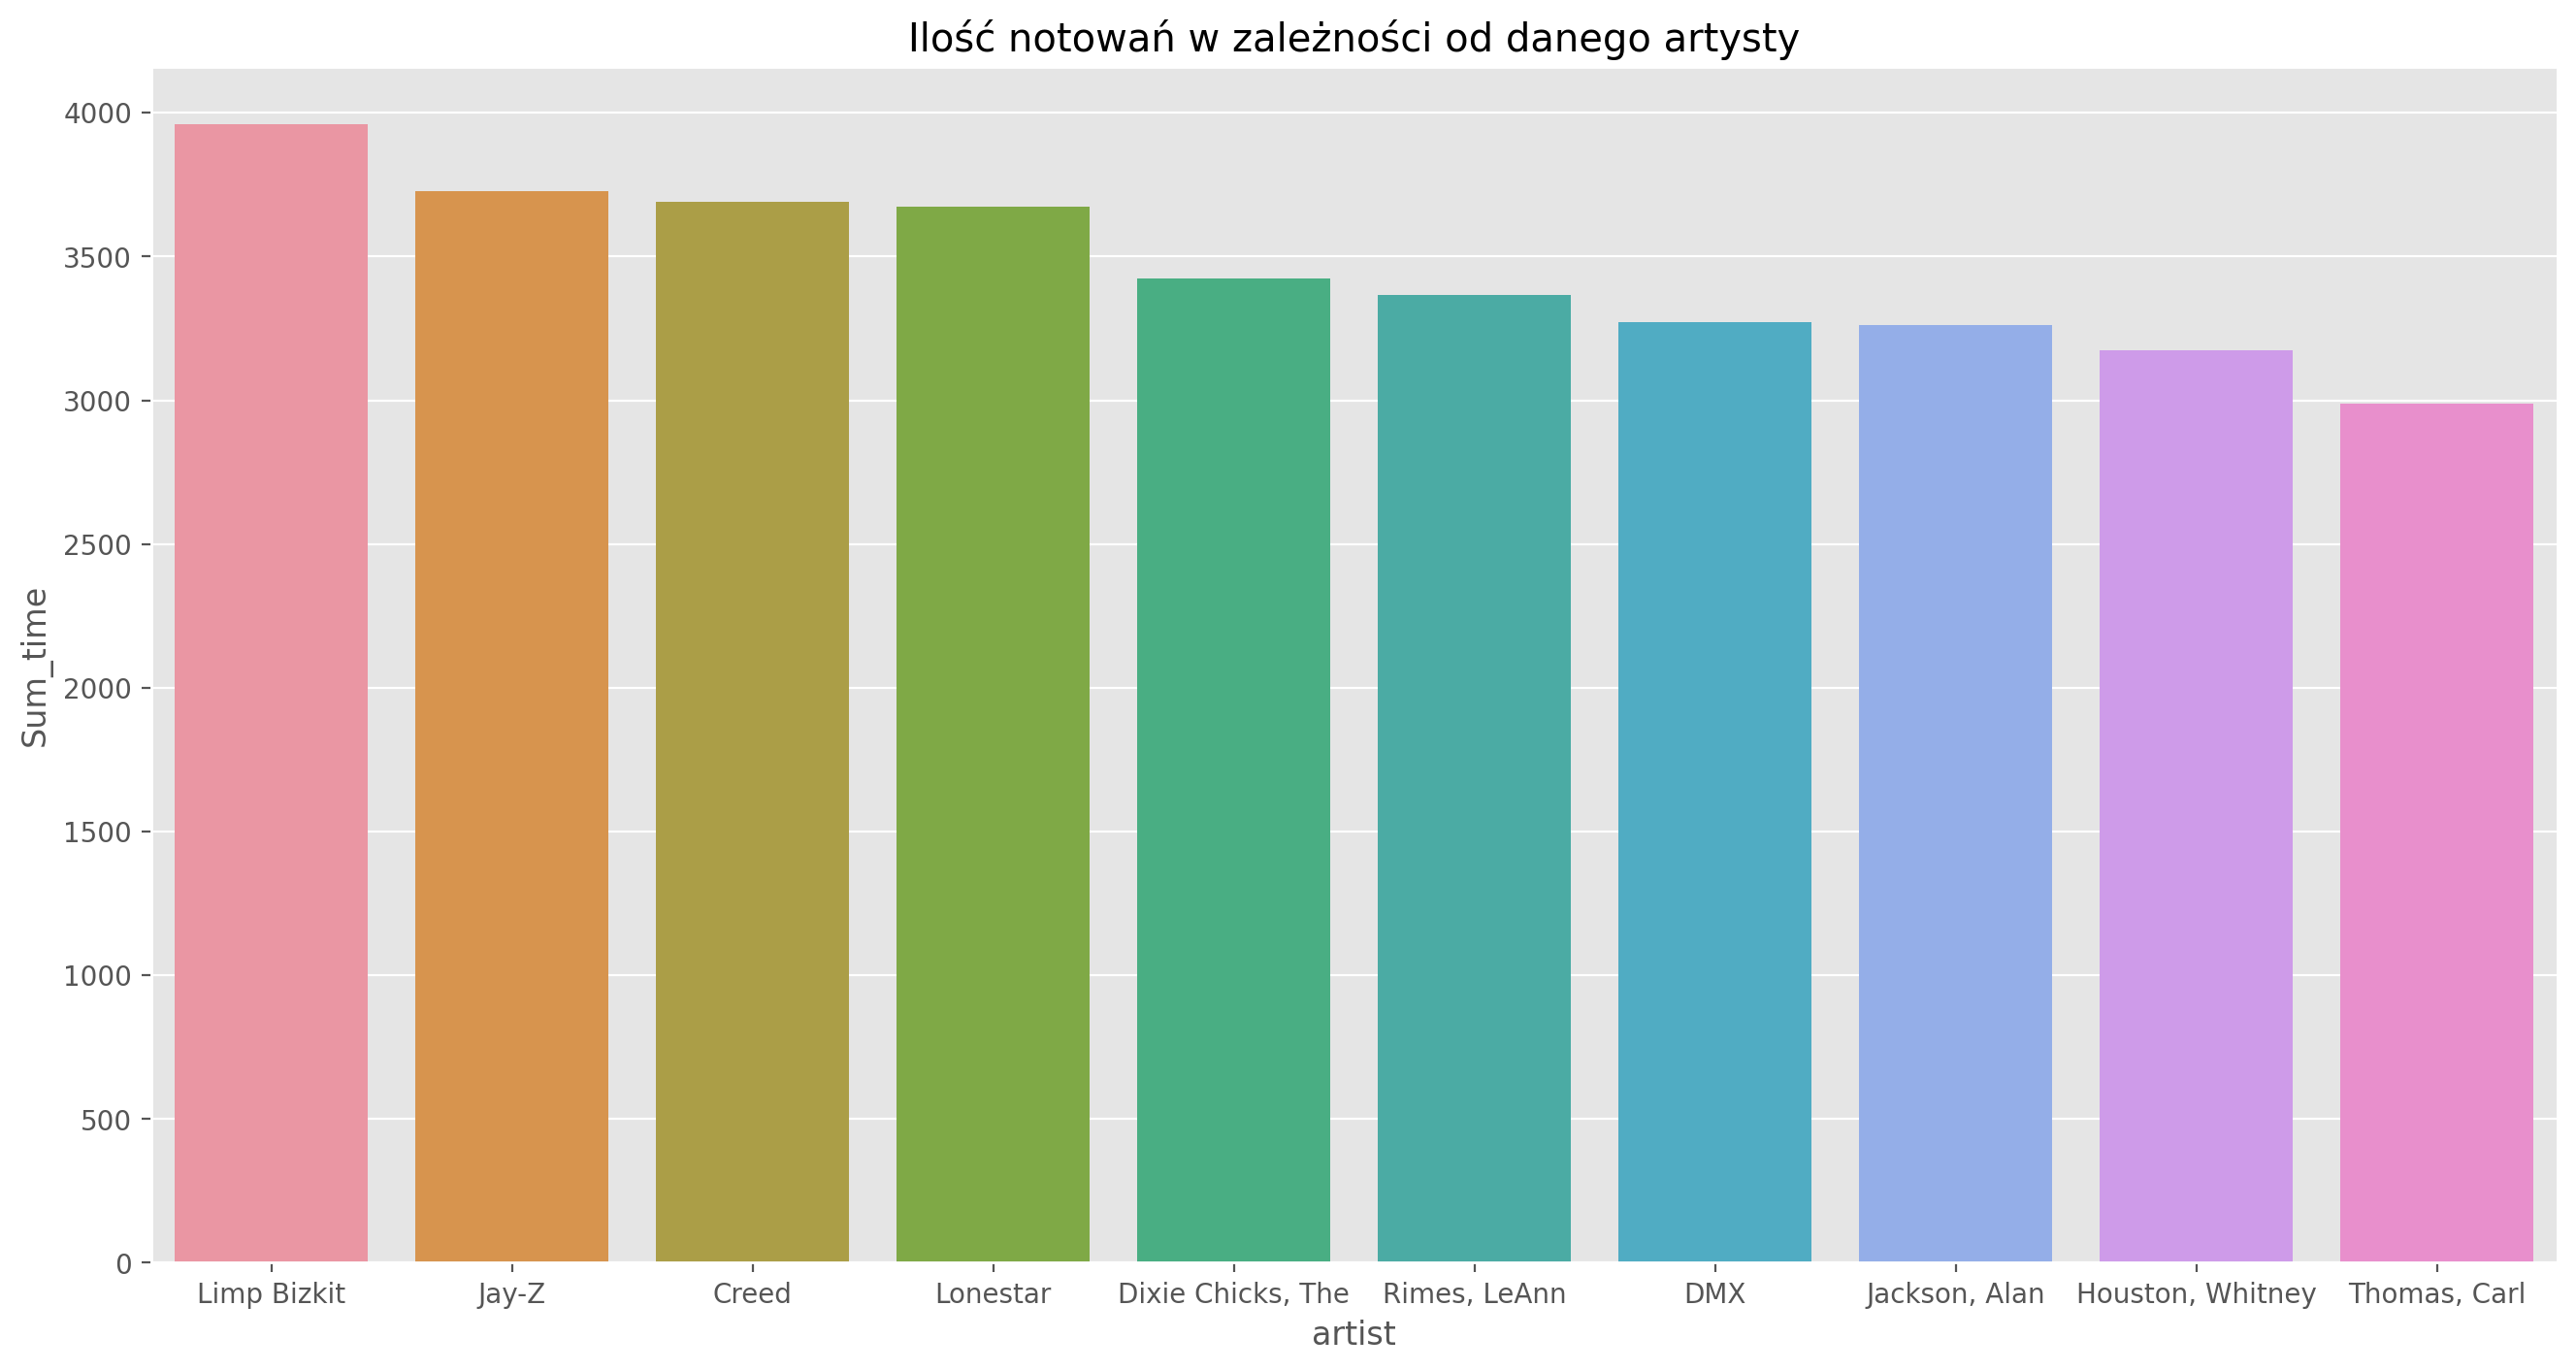

In [108]:
plt.figure(figsize=(16,8),dpi=200)
plt.title('Ilość notowań w zależności od danego artysty')
sns.barplot(data = df_gr.sort_values(by='Sum_time',ascending=False).head(10),x=df_gr.sort_values(by='Sum_time',ascending=False).head(10).index,y='Sum_time');

In [109]:
print('Z racji ilosci artystów, wyrysowałem tylko 10 najczęściej notowanych')

Z racji ilosci artystów, wyrysowałem tylko 10 najczęściej notowanych


<hr style="height:1px">


In [110]:
#Grupowanie danych po gatunkach
df_gr = df.groupby(by='genre').sum(numeric_only=True).sort_values(by='week_1',ascending=False)
df_gr

,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_57,week_58,week_59,week_60,week_61,week_62,week_63,week_64,week_65,week_76
genre,,,,,,,,,,,,,,,,,,,,,
Rock,10428,9092.0,8080.0,7076.0,6265.0,5645.0,5080.0,4627.0,4309.0,3769.0,...,29.0,32.0,39.0,39.0,43.0,47.0,50.0,50.0,49.0,0.0
Country,6098,5569.0,5242.0,4850.0,4569.0,4365.0,3750.0,3511.0,3285.0,3195.0,...,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,0.0,0.0
Rap,4940,4345.0,3783.0,3452.0,3140.0,2730.0,2525.0,2161.0,2235.0,2242.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R&B,1934,1556.0,1411.0,1157.0,1168.0,952.0,991.0,1076.0,993.0,958.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pop,713,544.0,524.0,543.0,417.0,282.0,253.0,237.0,254.0,305.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Latin,659,579.0,529.0,474.0,468.0,341.0,308.0,312.0,317.0,346.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Electronica,338,284.0,256.0,244.0,228.0,216.0,218.0,209.0,206.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jazz,89,89.0,7.0,8.0,66.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gospel,76,76.0,74.0,69.0,68.0,67.0,61.0,58.0,57.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
#Sumowanie czasu notowania gatunków na listach
df_gr['Sum_time'] = df_gr.sum(axis=1)

In [112]:
print('Najczęściej notowane gatunki muzyczne na liście billboard')
df_gr.sort_values('Sum_time',ascending=False)['Sum_time'].to_csv('../Analysis_Data/Genre_on_bilboard.csv')
df_gr.sort_values('Sum_time',ascending=False)['Sum_time'].head(20)

Najczęściej notowane gatunki muzyczne na liście billboard


genre
Rock           109189.0
Country         74025.0
Rap             47070.0
R&B             17652.0
Latin            8244.0
Pop              7530.0
Electronica      4525.0
Gospel           1355.0
Reggae           1086.0
Jazz              259.0
Name: Sum_time, dtype: float64

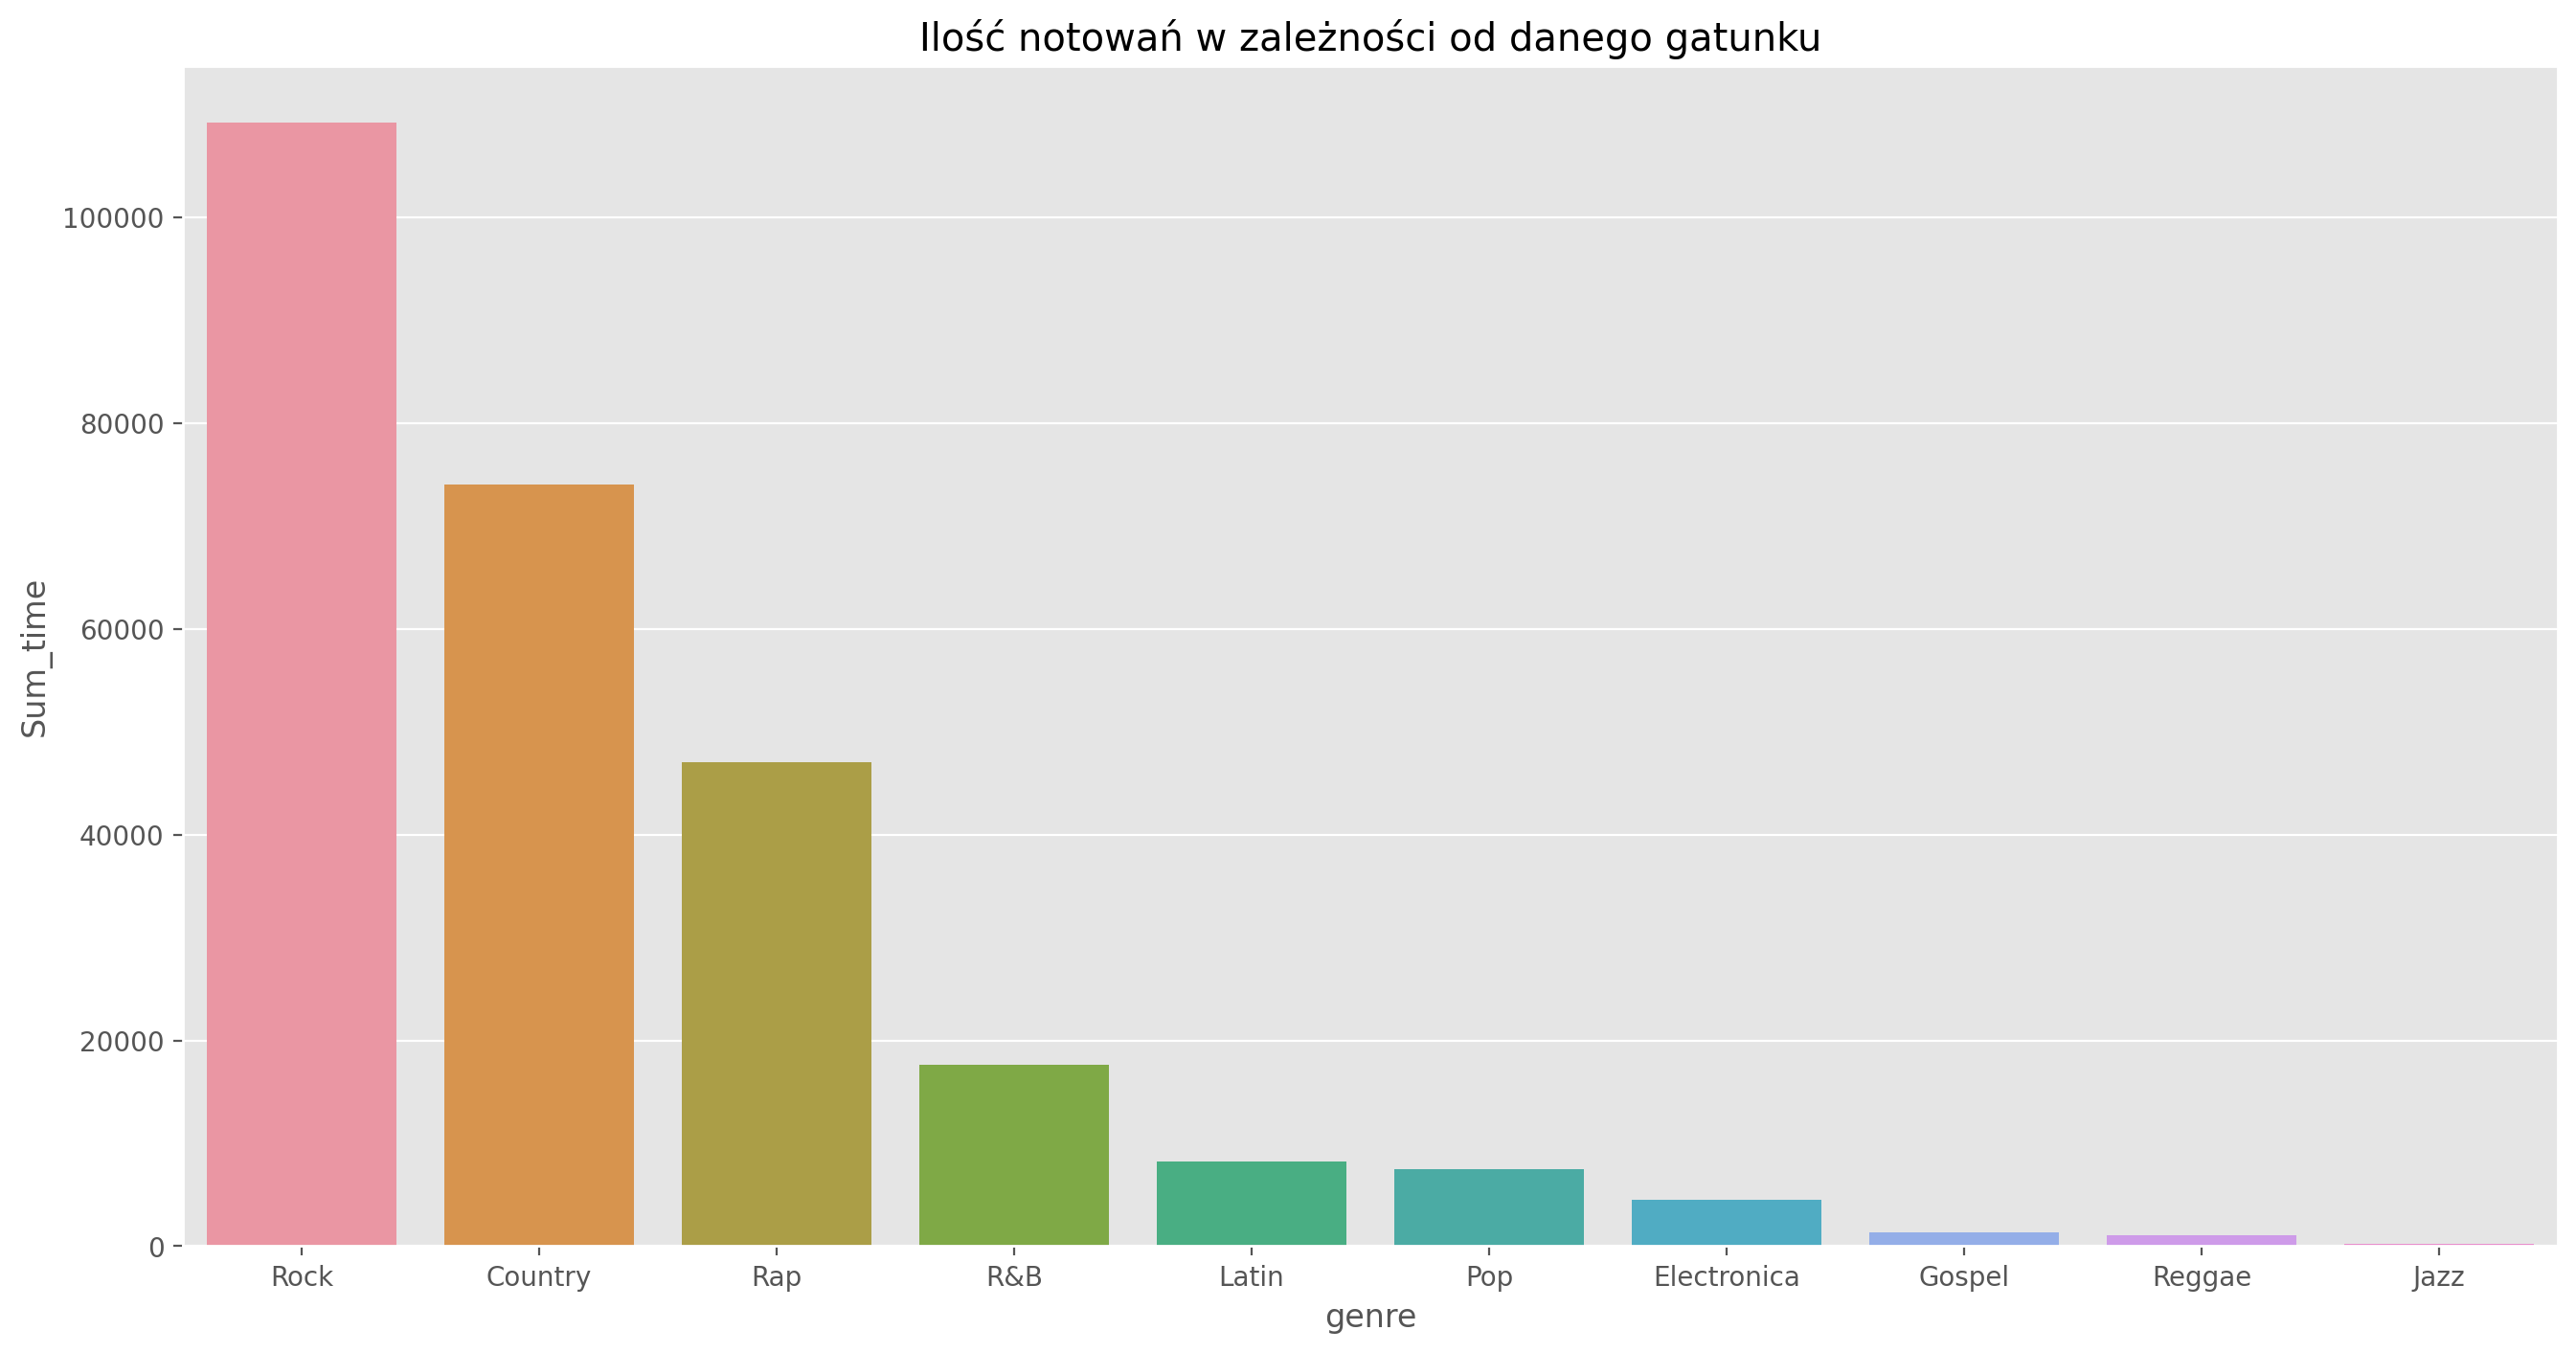

In [113]:
plt.figure(figsize=(16,8),dpi=200);
plt.title('Ilość notowań w zależności od danego gatunku')
sns.barplot(data = df_gr.sort_values(by='Sum_time',ascending=False),x=df_gr.sort_values(by='Sum_time',ascending=False).index,y='Sum_time');

<hr style="height:1px">


In [114]:
#Grupowanie danych po numerach
df_gr = df.groupby(by='track').sum(numeric_only=True).sort_values(by='week_1',ascending=False)
df_gr

,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_57,week_58,week_59,week_60,week_61,week_62,week_63,week_64,week_65,week_76
track,,,,,,,,,,,,,,,,,,,,,
Where I Wanna Be,177,166.0,164.0,149.0,141.0,41.0,36.0,41.0,38.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
No Mercy,100,99.0,99.0,0.0,0.0,98.0,94.0,92.0,95.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ta Da,100,99.0,97.0,97.0,100.0,95.0,99.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Get Up,100,97.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(Hot S**t) Country Grammar,100,99.0,96.0,76.0,55.0,37.0,24.0,24.0,30.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hot Boyz,36,21.0,13.0,9.0,7.0,7.0,5.0,7.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crybaby,28,34.0,48.0,62.0,77.0,90.0,95.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
There U Go,25,15.0,12.0,11.0,11.0,7.0,7.0,12.0,14.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
#Sumowanie czasu notowania numerów na listach
df_gr['Sum_time'] = df_gr.sum(axis=1)

In [116]:
print('20 najczęściej notowanych numerów na liście billboard')
df_gr.sort_values('Sum_time',ascending=False)['Sum_time'].to_csv('../Analysis_Data/Track_on_bilboard.csv')
df_gr.sort_values('Sum_time',ascending=False)['Sum_time'].head(20)

20 najczęściej notowanych numerów na liście billboard


track
Sexual (Li Da Di)               2328.0
Higher                          2101.0
Don't Call Me Baby              1853.0
I Disappear                     1722.0
Re-Arranged                     1669.0
Can't Fight The Moonlight       1659.0
Change Your Mind                1652.0
My Baby You                     1641.0
You Should've Told Me           1603.0
With Arms Wide Open             1590.0
Taking You Home                 1499.0
What You Want                   1492.0
I Wanna Be With You             1476.0
Californication                 1476.0
Amazed                          1470.0
You'll Always Be Loved By Me    1460.0
I'll Be                         1439.0
Mirror Mirror                   1434.0
Angels                          1433.0
Flowers On The Wall             1426.0
Name: Sum_time, dtype: float64

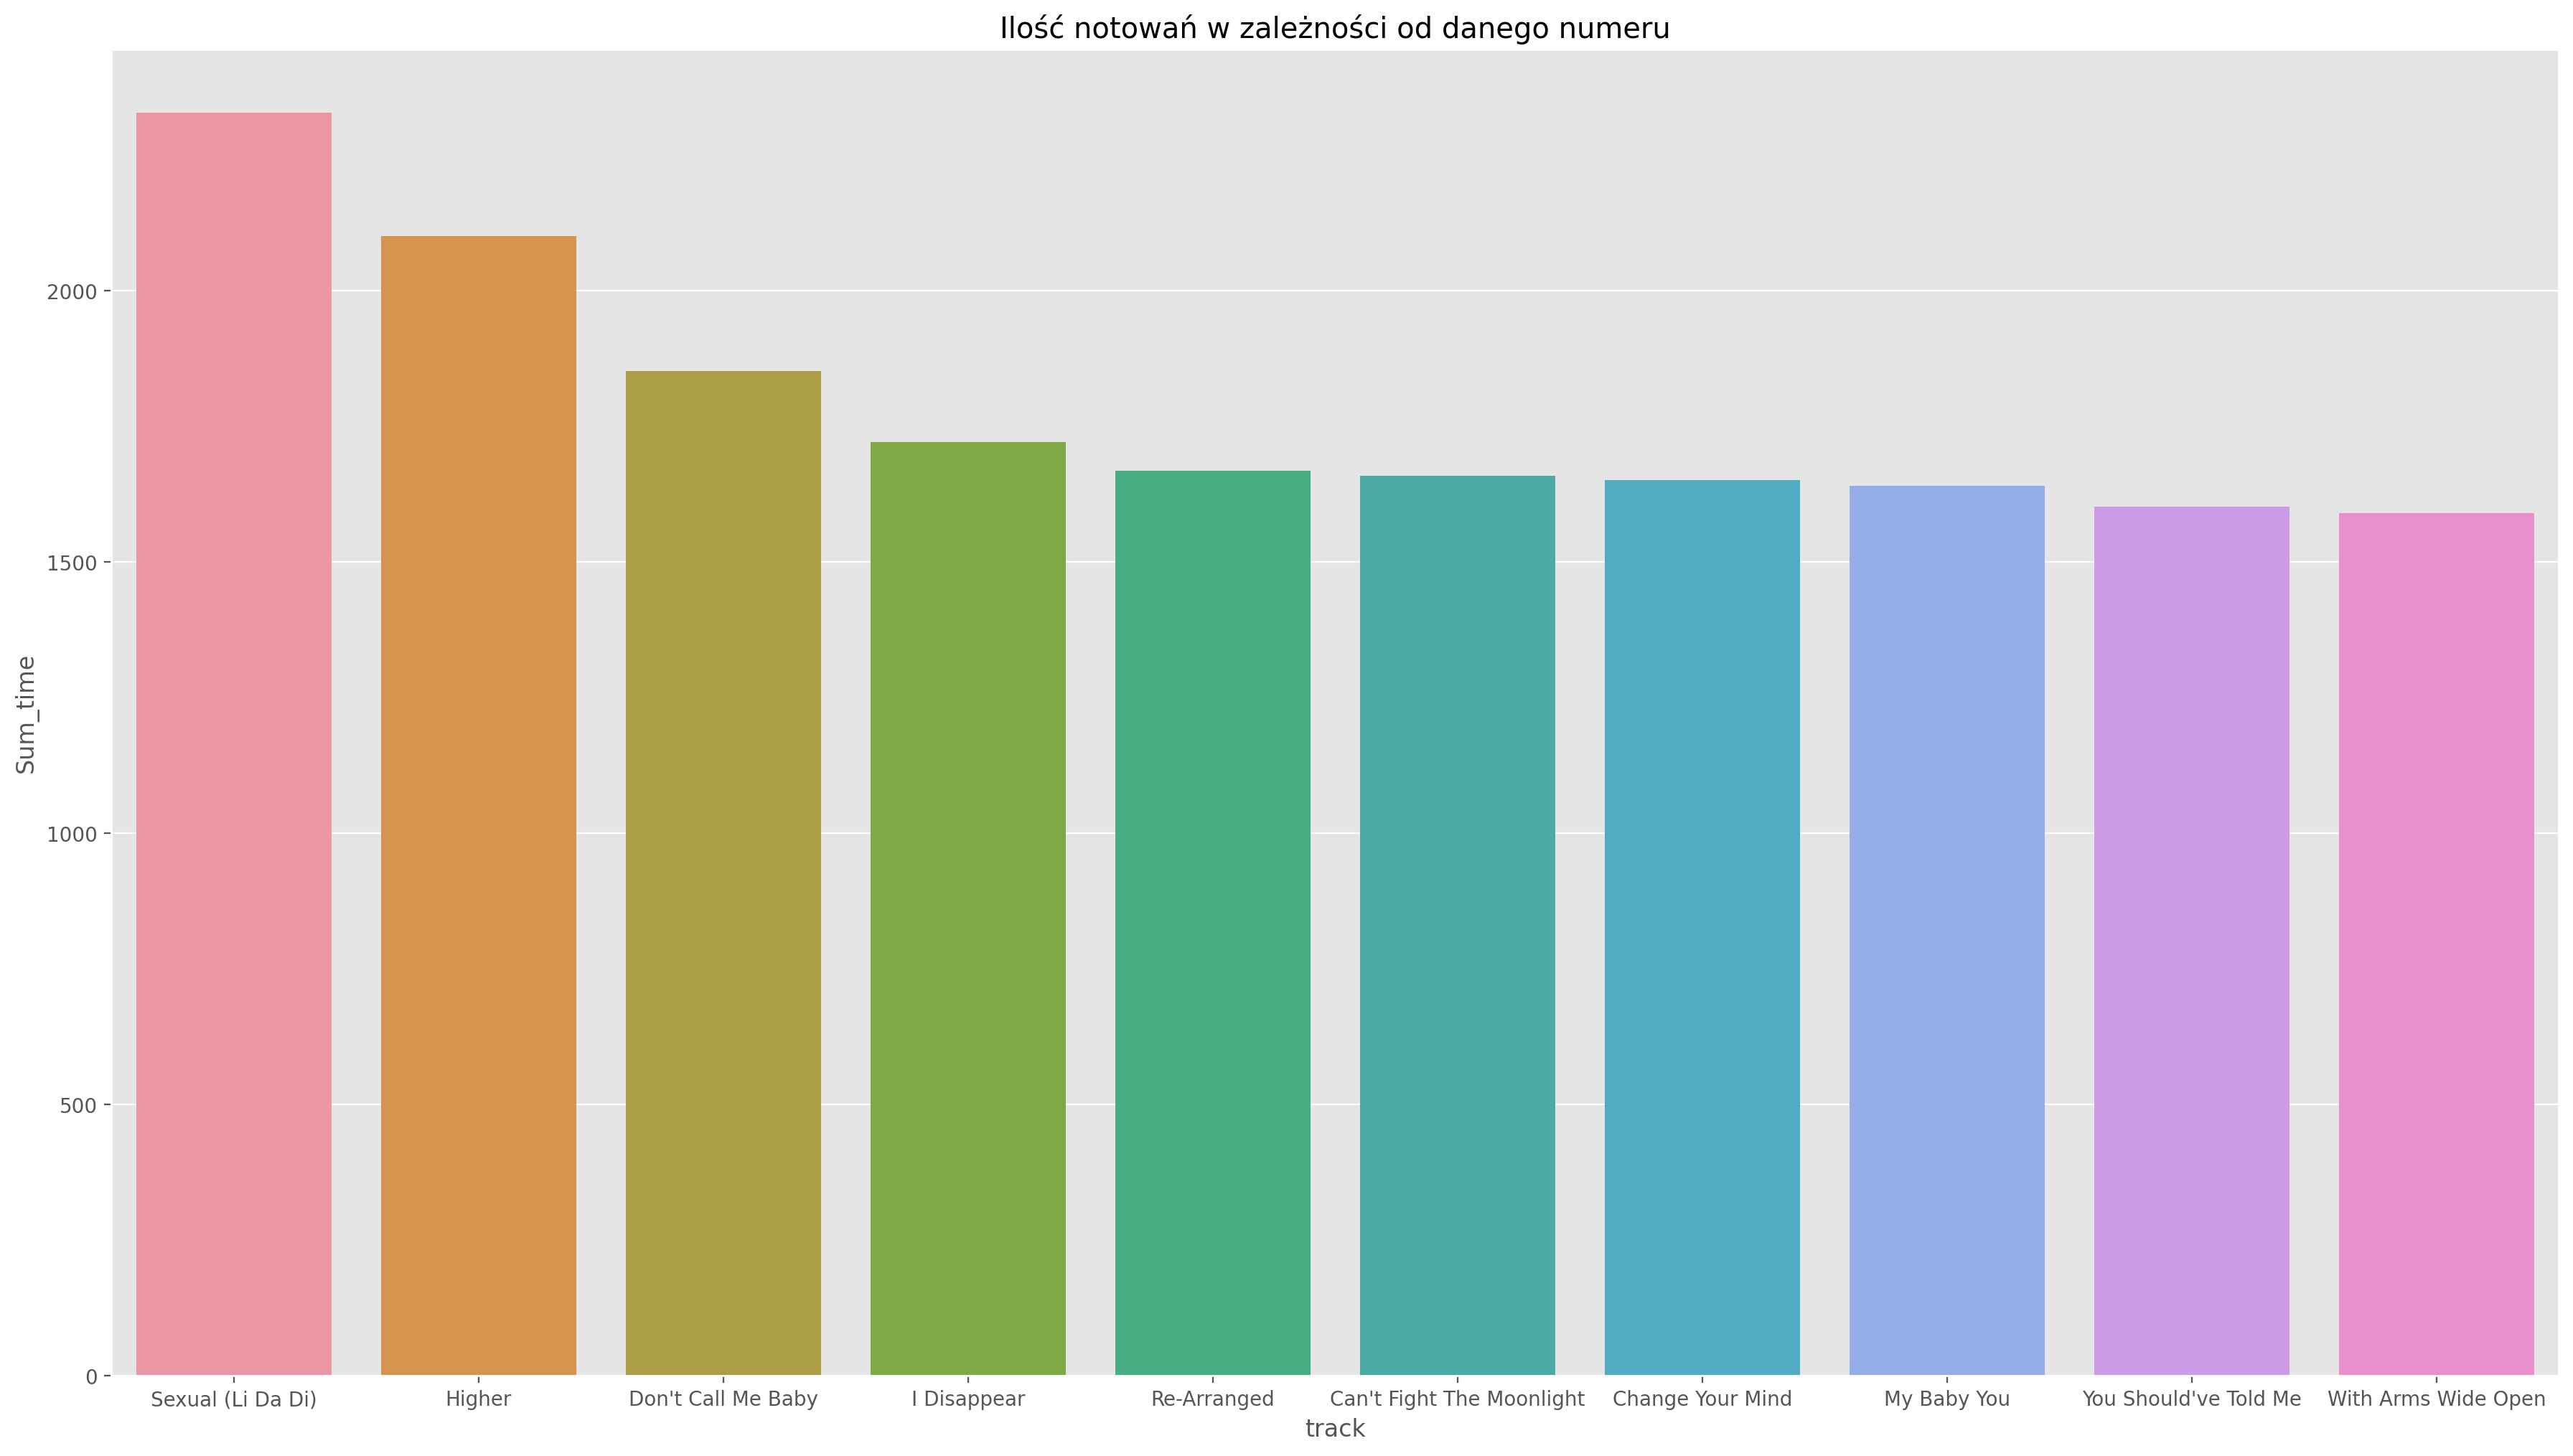

In [117]:
plt.figure(figsize=(22,12),dpi=200)
plt.title('Ilość notowań w zależności od danego numeru')
sns.barplot(data = df_gr.sort_values(by='Sum_time',ascending=False).head(10),x=df_gr.sort_values(by='Sum_time',ascending=False).head(10).index,y='Sum_time');